# TLDR

As of 5/29/2023, this notebook tests the new changes in our model class regarding the viral load progression with plateau. 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings

warnings.filterwarnings("ignore")

In [3]:
import matplotlib.pyplot as plt
import random
import numpy as np

In [4]:
from seirsplus.networks import generate_demographic_contact_network, household_country_data
from seirsplus.viral_model import ViralExtSEIRNetworkModel
from seirsplus.sim_loops_pooled_test import SimulationRunner

# Test model with low prevalence

(As explored in test_deterministic_simulation.ipynb), set max_dt = 1, ie., when tau exceeds max_dt, the model increments by max_dt in time but does not run any transition

In [20]:

random.seed(0)
np.random.seed(0)

N = 1000
INIT_EXPOSED = int(N * 0.001)

demographic_graphs, _, _ = generate_demographic_contact_network(
    N=N, 
    demographic_data=household_country_data('US'),
    distancing_scales=[0.7], 
    isolation_groups=[],
)

G = demographic_graphs['baseline']
# assign higher weights to inter-household edges
for e in G.edges():
    if "weight" not in G[e[0]][e[1]]:
        G[e[0]][e[1]]["weight"] = 10**10


Generated overall age distribution:
0-9: 0.1140	(-0.0070 from target)
10-19: 0.1310	(0.0000 from target)
20-29: 0.1410	(0.0040 from target)
30-39: 0.1440	(0.0110 from target)
40-49: 0.1170	(-0.0070 from target)
50-59: 0.1290	(-0.0020 from target)
60-69: 0.1020	(-0.0130 from target)
70-79: 0.0720	(0.0020 from target)
80+: 0.0500	(0.0120 from target)

Generated household size distribution:
1: 0.3259	(0.0422 from target)
2: 0.2988	(-0.0463 from target)
3: 0.1160	(-0.0346 from target)
4: 0.1481	(0.0205 from target)
5: 0.0691	(0.0114 from target)
6: 0.0346	(0.0119 from target)
7: 0.0074	(-0.0051 from target)
Num households: 405
mean household size: 2.448393594

Generating graph for 0-9...
Generating graph for 10-19...
Generating graph for 20-59...
Generating graph for 60+...


In [21]:
from seirsplus.viral_model import ViralExtSEIRNetworkModel
from seirsplus.sim_loops_pooled_test import SimulationRunner

test_model = ViralExtSEIRNetworkModel(
    G = G,
    beta = 0.5,
    sigma = 0.2,
    lamda = 0.5,
    gamma  = 0.25,
    seed = 0,
    initE = INIT_EXPOSED,
    transition_mode = "time_in_state",
    verbose=0 # 1 for slightly verbose, 2 for very verbose
)

sim_correlated = SimulationRunner(
    model=test_model,
    pooling_strategy='correlated',
    T = 30,
    num_groups = 10,
    pool_size = 5,
    seed = 0,
    verbose=True,
    save_results=False,
    max_dt = 1
)

sim_correlated.run_simulation()



Generating walks (CPU: 1): 100%|██████████| 10/10 [00:02<00:00,  3.94it/s]


Running simulation with seed 0 for strategy correlated...
Running screening for group 0 on day 0...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 47.74it/s]


Screening day:  0  self.model.t:  0.01
Running screening for group 1 on day 1...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 49.98it/s]


Screening day:  1  self.model.t:  1.0000000000000007
{'t': 1.2100149418755937, 'transitionNode': 926, 'transitionNodeVL': 6.54142205303562, 'transitionType': 'EtoIPRE'}
{'t': 1.2100149418995263, 'transitionNode': 547, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 1.2100149420095005, 'transitionNode': 546, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 1.210014942401116, 'transitionNode': 925, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 1.2100149426834406, 'transitionNode': 927, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 1.210014944030336, 'transitionNode': 545, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
Running screening for group 2 on day 2...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 48.78it/s]


Screening day:  2  self.model.t:  2.210014944030336
Running screening for group 3 on day 3...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 34.74it/s]


Screening day:  3  self.model.t:  3.210014944030336
{'t': 3.2100212349072796, 'transitionNode': 925, 'transitionNodeVL': 9.723595966502245, 'transitionType': 'EtoIPRE'}
{'t': 3.210024543685167, 'transitionNode': 546, 'transitionNodeVL': 9.228063786737303, 'transitionType': 'EtoIPRE'}
Running screening for group 4 on day 4...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 29.91it/s]


Screening day:  4  self.model.t:  4.210024543685167
{'t': 4.210028702244491, 'transitionNode': 545, 'transitionNodeVL': 8.534676672440877, 'transitionType': 'EtoIPRE'}
{'t': 4.210031608322106, 'transitionNode': 927, 'transitionNodeVL': 7.646254618592979, 'transitionType': 'EtoIPRE'}
{'t': 4.210040325507812, 'transitionNode': 547, 'transitionNodeVL': 9.232792547847191, 'transitionType': 'EtoIPRE'}
Running screening for group 5 on day 5...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 52.06it/s]


Screening day:  5  self.model.t:  5.210040325507812
{'t': 5.210070024457962, 'transitionNode': 926, 'transitionNodeVL': 6.361618522031314, 'transitionType': 'QPREtoQSYM'}
Running screening for group 6 on day 6...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 46.21it/s]


Screening day:  6  self.model.t:  6.210070024457962
{'t': 6.210072698998494, 'transitionNode': 546, 'transitionNodeVL': 8.620971872752353, 'transitionType': 'IPREtoISYM'}
{'t': 6.210078546426792, 'transitionNode': 547, 'transitionNodeVL': 8.97175389365317, 'transitionType': 'IPREtoISYM'}
Running screening for group 7 on day 7...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 44.87it/s]


Screening day:  7  self.model.t:  7.210078546426792
{'t': 7.210079945385164, 'transitionNode': 925, 'transitionNodeVL': 9.407267892978869, 'transitionType': 'IPREtoISYM'}
{'t': 7.2100810535315345, 'transitionNode': 545, 'transitionNodeVL': 7.958723213446282, 'transitionType': 'IPREtoISYM'}
Running screening for group 8 on day 8...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 26.41it/s]


Screening day:  8  self.model.t:  8.210081053531535
{'t': 8.210088272702919, 'transitionNode': 927, 'transitionNodeVL': 7.149320732320479, 'transitionType': 'IPREtoISYM'}
Running screening for group 9 on day 9...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 35.97it/s]


Screening day:  9  self.model.t:  9.210088272702919
Running screening for group 0 on day 10...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 44.66it/s]


Screening day:  10  self.model.t:  10.210088272702919
Running screening for group 1 on day 11...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 34.99it/s]


Screening day:  11  self.model.t:  11.210088272702919
Running screening for group 2 on day 12...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 33.69it/s]


Screening day:  12  self.model.t:  12.210088272702919
{'t': 12.210095510846724, 'transitionNode': 926, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
Running screening for group 3 on day 13...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 33.99it/s]


Screening day:  13  self.model.t:  13.210095510846724
Running screening for group 4 on day 14...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 29.75it/s]


Screening day:  14  self.model.t:  14.220095510846724
Running screening for group 5 on day 15...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 50.01it/s]


Screening day:  15  self.model.t:  15.220095510846724
Running screening for group 6 on day 16...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 46.53it/s]


Screening day:  16  self.model.t:  16.220095510846726
Running screening for group 7 on day 17...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 54.07it/s]


Screening day:  17  self.model.t:  17.220095510846726
Running screening for group 8 on day 18...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 39.71it/s]


Screening day:  18  self.model.t:  18.220095510846726
{'t': 18.22009764486343, 'transitionNode': 547, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
{'t': 18.220099758423007, 'transitionNode': 925, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
{'t': 18.220117119726474, 'transitionNode': 545, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
Running screening for group 9 on day 19...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 60.06it/s]


Screening day:  19  self.model.t:  19.220117119726474
{'t': 19.2201314502528, 'transitionNode': 546, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
Running screening for group 0 on day 20...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 51.28it/s]


Screening day:  20  self.model.t:  20.2201314502528
{'t': 20.22014589556816, 'transitionNode': 927, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
Running screening for group 1 on day 21...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 55.69it/s]


Screening day:  21  self.model.t:  21.00014589556828
Running screening for group 2 on day 22...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 59.59it/s]


Screening day:  22  self.model.t:  22.000145895568437
Running screening for group 3 on day 23...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 49.18it/s]


Screening day:  23  self.model.t:  23.000145895568593
Running screening for group 4 on day 24...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 18.95it/s]


Screening day:  24  self.model.t:  24.00014589556875
Running screening for group 5 on day 25...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 51.83it/s]


Screening day:  25  self.model.t:  25.000145895568906
Running screening for group 6 on day 26...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 51.01it/s]


Screening day:  26  self.model.t:  26.000145895569062
Running screening for group 7 on day 27...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 44.07it/s]


Screening day:  27  self.model.t:  27.00014589556922


Text(0.5, 1.0, 'Recorded viral load (solid) and underlying model values (dashed)')

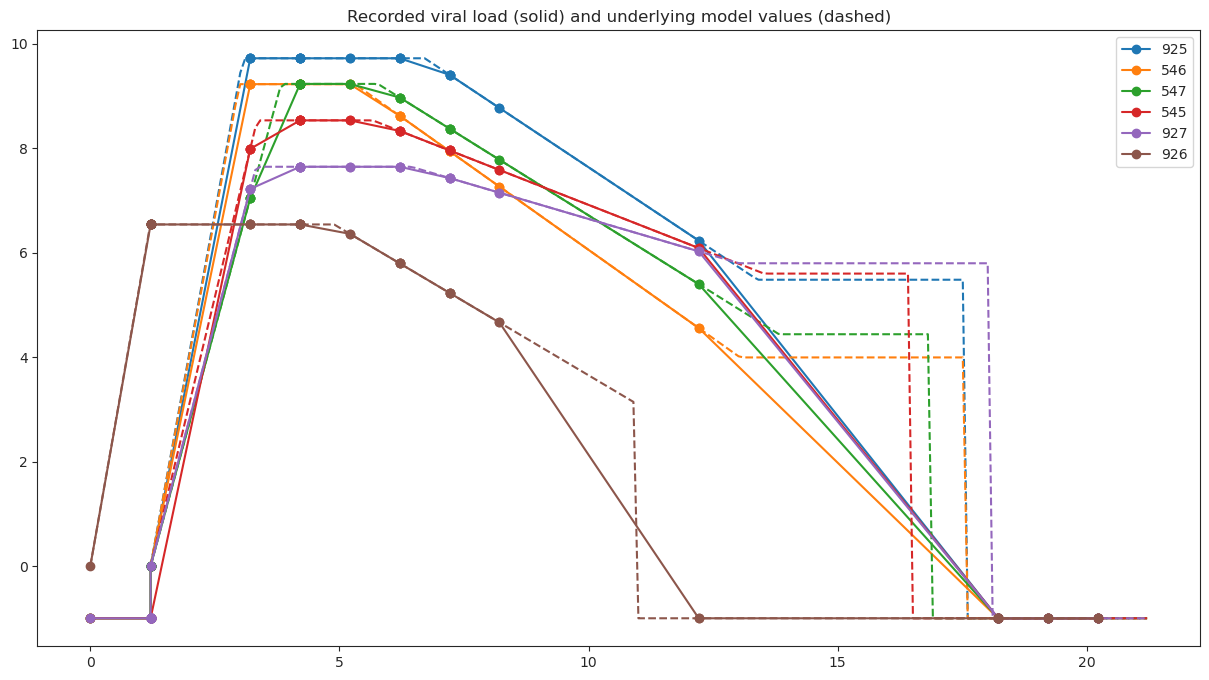

In [22]:
from seirsplus.calibration import _get_vl_with_plateau

plt.figure(figsize=(15,8))

for i in [925, 546, 547, 545, 927, 926]:
    # plot recorded infection curves (recording times = times at which a transition happened;
    # might be sparse if initial prevalence is low)
    plt.plot(
        sim_correlated.model.VL_over_time["time_points"],
        sim_correlated.model.VL_over_time["VL_time_series"][i],
        '-o',
        label=str(i), 
    )

    # plot underlying model values to make sure the recorded values match
    tmp = []
    time_range = np.linspace(
        sim_correlated.model.infection_start_times[i], 
        sim_correlated.model.infection_start_times[i] + 20, 
        201
    )
    for t in time_range:
        tmp.append(
            _get_vl_with_plateau(
                critical_time_points = sim_correlated.model.VL_params_by_node[i]["critical_time_points"],
                peak_plateau_height = sim_correlated.model.VL_params_by_node[i]["peak_plateau_height"],
                tail_height = sim_correlated.model.VL_params_by_node[i]["tail_height"],
                sample_time = t - sim_correlated.model.infection_start_times[i]
            )
        )
    plt.plot(time_range, tmp, '--', color=plt.gca().lines[-1].get_color())
plt.legend()

plt.title("Recorded viral load (solid) and underlying model values (dashed)")

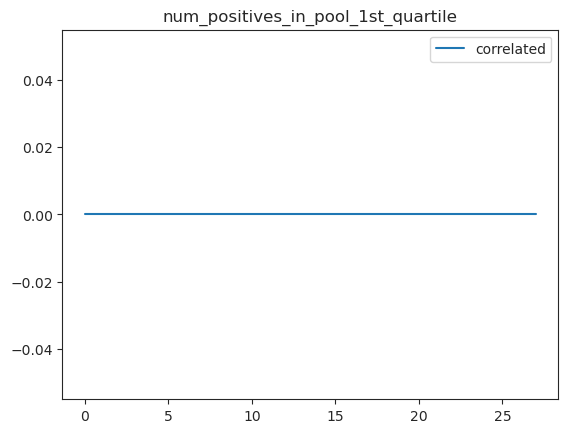

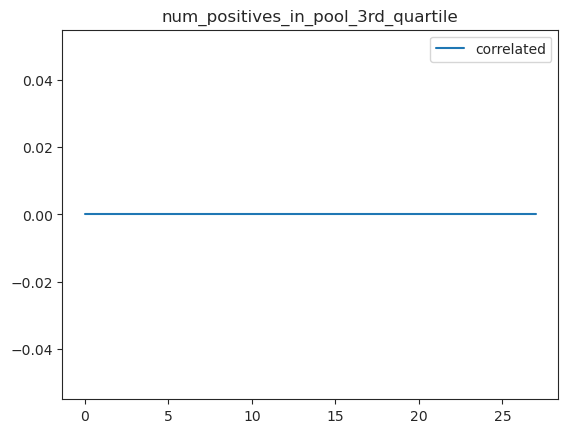

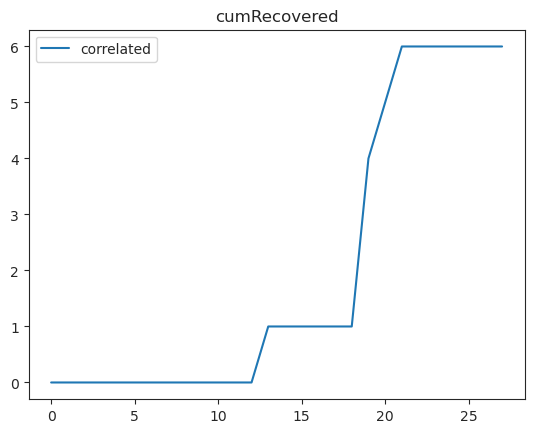

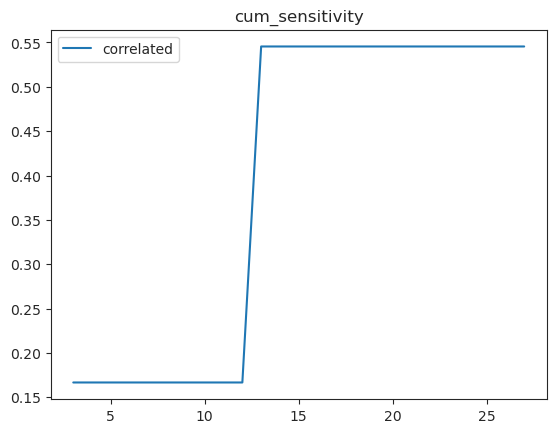

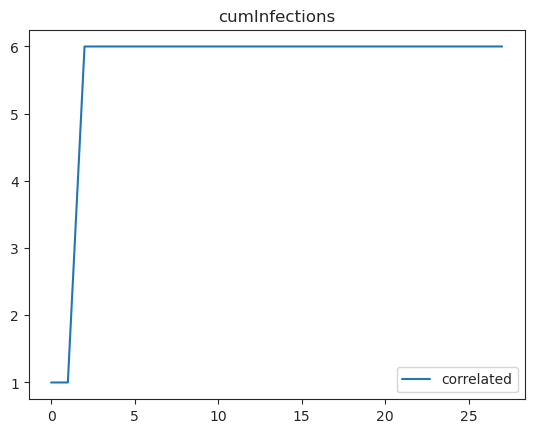

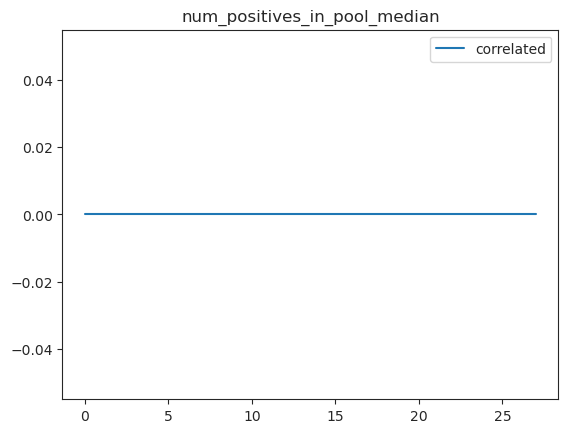

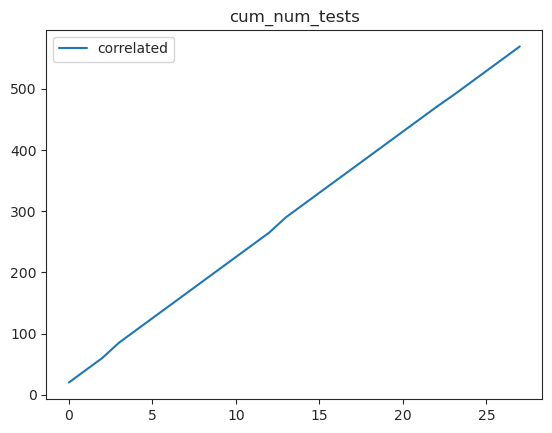

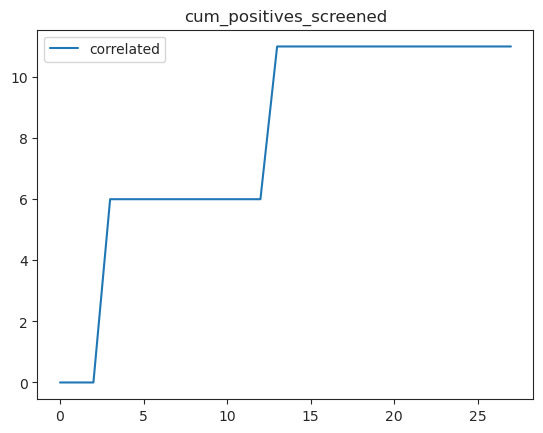

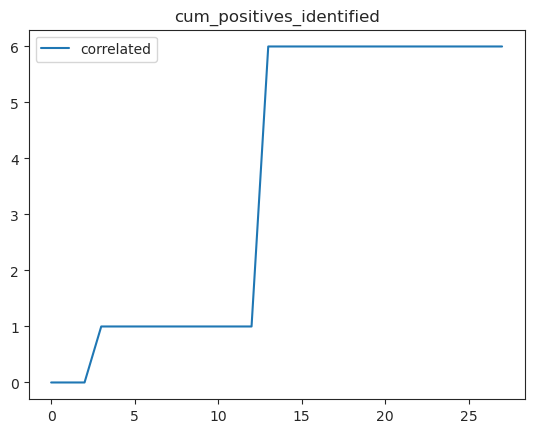

In [23]:
metrics = sim_correlated.overall_results[0].keys()
metrics = set(metrics) - {"day"}

for metric in metrics:
    plt.plot([result[metric] for result in sim_correlated.overall_results])
    plt.title(metric)
    plt.legend(['correlated', 'naive'])
    plt.show()

In [24]:
sim_correlated.model.symptomatic_by_node[546]

array([ True])

In [25]:
sim_correlated.model.VL_params_by_node[546]

{'critical_time_points': [1.7803994237828509,
  4.103467151618752,
  11.83182284159208,
  16.339355405664087],
 'peak_plateau_height': 9.228063786737303,
 'tail_height': 3.995104373957224}

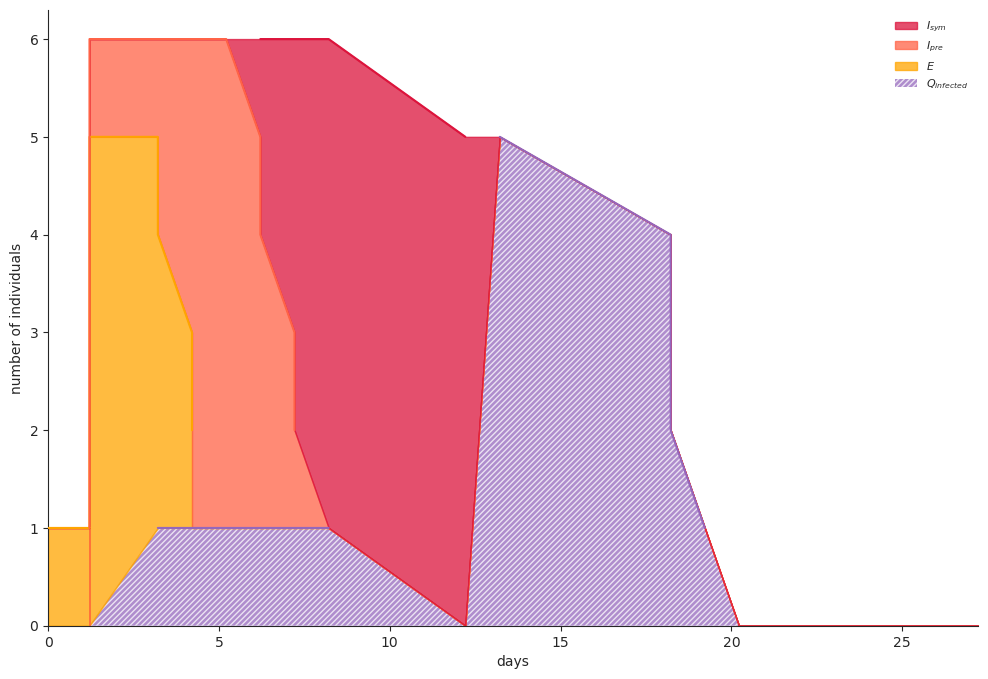

(<Figure size 1200x800 with 1 Axes>,
 <Axes: xlabel='days', ylabel='number of individuals'>)

In [26]:
sim_correlated.model.figure_infections(plot_percentages=False)

# Try a higher initial prevalence

In [27]:

random.seed(0)
np.random.seed(0)

N = 1000
INIT_EXPOSED = int(N * 0.01)

demographic_graphs, _, _ = generate_demographic_contact_network(
    N=N, 
    demographic_data=household_country_data('US'),
    distancing_scales=[0.7], 
    isolation_groups=[],
)

G = demographic_graphs['baseline']
# assign higher weights to inter-household edges
for e in G.edges():
    if "weight" not in G[e[0]][e[1]]:
        G[e[0]][e[1]]["weight"] = 10**10


Generated overall age distribution:
0-9: 0.1140	(-0.0070 from target)
10-19: 0.1310	(0.0000 from target)
20-29: 0.1410	(0.0040 from target)
30-39: 0.1440	(0.0110 from target)
40-49: 0.1170	(-0.0070 from target)
50-59: 0.1290	(-0.0020 from target)
60-69: 0.1020	(-0.0130 from target)
70-79: 0.0720	(0.0020 from target)
80+: 0.0500	(0.0120 from target)

Generated household size distribution:
1: 0.3259	(0.0422 from target)
2: 0.2988	(-0.0463 from target)
3: 0.1160	(-0.0346 from target)
4: 0.1481	(0.0205 from target)
5: 0.0691	(0.0114 from target)
6: 0.0346	(0.0119 from target)
7: 0.0074	(-0.0051 from target)
Num households: 405
mean household size: 2.448393594

Generating graph for 0-9...
Generating graph for 10-19...
Generating graph for 20-59...
Generating graph for 60+...


In [28]:
from seirsplus.viral_model import ViralExtSEIRNetworkModel
from seirsplus.sim_loops_pooled_test import SimulationRunner

test_model_2 = ViralExtSEIRNetworkModel(
    G = G,
    beta = 0.5,
    sigma = 0.2,
    lamda = 0.5,
    gamma  = 0.25,
    seed = 0,
    initE = INIT_EXPOSED,
    transition_mode = "time_in_state",
    verbose=0
)

sim_correlated_2 = SimulationRunner(
    model=test_model_2,
    pooling_strategy='correlated',
    T = 30,
    num_groups = 10,
    pool_size = 5,
    seed = 0,
    verbose=True,
    save_results=False,
    max_dt = 1
)

sim_correlated_2.run_simulation()



Generating walks (CPU: 1): 100%|██████████| 10/10 [00:02<00:00,  3.88it/s]


Running simulation with seed 0 for strategy correlated...
Running screening for group 0 on day 0...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 27.93it/s]


Screening day:  0  self.model.t:  0.01
Running screening for group 1 on day 1...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 58.86it/s]


Screening day:  1  self.model.t:  1.0000000000000007
{'t': 1.0100124695346435, 'transitionNode': 740, 'transitionNodeVL': 8.78452442477977, 'transitionType': 'EtoIPRE'}
{'t': 1.0100124695491903, 'transitionNode': 984, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 1.0100124696116393, 'transitionNode': 738, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 1.0100124702818345, 'transitionNode': 739, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
Running screening for group 2 on day 2...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 27.38it/s]


Screening day:  2  self.model.t:  2.0100124702818345
{'t': 2.0100184741295912, 'transitionNode': 926, 'transitionNodeVL': 6.54142205303562, 'transitionType': 'EtoIPRE'}
{'t': 2.01001847423417, 'transitionNode': 547, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 2.010018474285756, 'transitionNode': 545, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 2.010018475712482, 'transitionNode': 927, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 2.010018475806499, 'transitionNode': 925, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 2.0100184776659464, 'transitionNode': 546, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 2.010018801459672, 'transitionNode': 314, 'transitionNodeVL': 6.001567429012347, 'transitionType': 'EtoIPRE'}
{'t': 2.0100188023963423, 'transitionNode': 814, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 2.0100188037502082, 'transitionNode': 813, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 2.010018804100

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 33.95it/s]


Screening day:  3  self.model.t:  3.679204405450671
{'t': 3.679207906903881, 'transitionNode': 313, 'transitionNodeVL': 5.930620448427657, 'transitionType': 'QEtoQPRE'}
{'t': 3.6792124500651133, 'transitionNode': 738, 'transitionNodeVL': 8.615384104186791, 'transitionType': 'EtoIPRE'}
Running screening for group 4 on day 4...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 38.47it/s]


Screening day:  4  self.model.t:  4.679212450065114
{'t': 4.679212569693859, 'transitionNode': 547, 'transitionNodeVL': 9.232792547847191, 'transitionType': 'QEtoQPRE'}
{'t': 4.679213197975577, 'transitionNode': 814, 'transitionNodeVL': 9.177351175043656, 'transitionType': 'QEtoQPRE'}
{'t': 4.679213254207699, 'transitionNode': 546, 'transitionNodeVL': 9.228063786737303, 'transitionType': 'QEtoQPRE'}
{'t': 4.679213565780391, 'transitionNode': 312, 'transitionNodeVL': 8.221222914838865, 'transitionType': 'QEtoQPRE'}
{'t': 4.6792149965101535, 'transitionNode': 300, 'transitionNodeVL': 9.640293352871742, 'transitionType': 'EtoIPRE'}
{'t': 4.679216225077419, 'transitionNode': 299, 'transitionNodeVL': 8.332272207225238, 'transitionType': 'EtoIPRE'}
{'t': 4.679216896117965, 'transitionNode': 298, 'transitionNodeVL': 9.217447863214634, 'transitionType': 'EtoIPRE'}
{'t': 4.67921814290827, 'transitionNode': 925, 'transitionNodeVL': 9.723595966502245, 'transitionType': 'QEtoQPRE'}
{'t': 4.6792182

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 59.85it/s]


Screening day:  5  self.model.t:  5.0895160465197415
{'t': 5.089521128870567, 'transitionNode': 813, 'transitionNodeVL': 8.646333368151328, 'transitionType': 'QEtoQPRE'}
{'t': 5.08953059602053, 'transitionNode': 753, 'transitionNodeVL': 8.131947160713374, 'transitionType': 'EtoIPRE'}
{'t': 5.089540380754783, 'transitionNode': 959, 'transitionNodeVL': 5.626504476450899, 'transitionType': 'QPREtoQSYM'}
{'t': 5.69422083213291, 'transitionNode': 779, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 5.694221204716796, 'transitionNode': 254, 'transitionNodeVL': 8.971386881296098, 'transitionType': 'IPREtoISYM'}
{'t': 5.694221614257472, 'transitionNode': 201, 'transitionNodeVL': 9.747268977469345, 'transitionType': 'EtoIPRE'}
{'t': 5.6942218730266, 'transitionNode': 807, 'transitionNodeVL': 9.476089037464675, 'transitionType': 'IPREtoISYM'}
{'t': 5.694227505275094, 'transitionNode': 856, 'transitionNodeVL': 5.188546320870816, 'transitionType': 'EtoIPRE'}
{'t': 5.69422815645743, 'trans

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 36.39it/s]


Screening day:  6  self.model.t:  6.301135392241186
{'t': 6.301135784881469, 'transitionNode': 926, 'transitionNodeVL': 5.744551760179284, 'transitionType': 'QPREtoQSYM'}
{'t': 6.301140245534961, 'transitionNode': 754, 'transitionNodeVL': 4.812173856574459, 'transitionType': 'QPREtoQSYM'}
{'t': 6.301142029972059, 'transitionNode': 255, 'transitionNodeVL': 5.340503925952506, 'transitionType': 'EtoIPRE'}
{'t': 6.301144201335616, 'transitionNode': 840, 'transitionNodeVL': 6.448630298461933, 'transitionType': 'IPREtoISYM'}
{'t': 6.3011447760648975, 'transitionNode': 958, 'transitionNodeVL': 8.373510631638208, 'transitionType': 'EtoIPRE'}
{'t': 6.301147553409606, 'transitionNode': 857, 'transitionNodeVL': 4.906816130835609, 'transitionType': 'IPREtoISYM'}
{'t': 6.646115325667278, 'transitionNode': 436, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 6.646118738402428, 'transitionNode': 505, 'transitionNodeVL': 6.859372293733062, 'transitionType': 'EtoIPRE'}
{'t': 6.64612225114532, 

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 43.58it/s]


Screening day:  7  self.model.t:  7.501186235374324
{'t': 7.501187077620563, 'transitionNode': 813, 'transitionNodeVL': 8.269826967167667, 'transitionType': 'QPREtoQSYM'}
{'t': 7.50118820439086, 'transitionNode': 753, 'transitionNodeVL': 7.8768265182189445, 'transitionType': 'QPREtoQSYM'}
{'t': 7.501196610412116, 'transitionNode': 782, 'transitionNodeVL': 7.273373028925804, 'transitionType': 'QPREtoQSYM'}
{'t': 7.5011971425738855, 'transitionNode': 356, 'transitionNodeVL': 9.663188512889544, 'transitionType': 'EtoIPRE'}
{'t': 7.501198113495657, 'transitionNode': 287, 'transitionNodeVL': 6.563357230153785, 'transitionType': 'IPREtoISYM'}
{'t': 7.501198824464831, 'transitionNode': 313, 'transitionNodeVL': 5.728022772167202, 'transitionType': 'QPREtoQSYM'}
{'t': 7.501207049823313, 'transitionNode': 546, 'transitionNodeVL': 8.28842149266619, 'transitionType': 'QPREtoQSYM'}
{'t': 7.501216697525522, 'transitionNode': 545, 'transitionNodeVL': 8.148905327252885, 'transitionType': 'QPREtoQSYM'}

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 44.80it/s]


Screening day:  8  self.model.t:  8.873703124231735
{'t': 8.873703805368763, 'transitionNode': 394, 'transitionNodeVL': 9.665965946200824, 'transitionType': 'EtoIPRE'}
{'t': 8.87370393397269, 'transitionNode': 514, 'transitionNodeVL': 8.769182515584205, 'transitionType': 'IPREtoISYM'}
{'t': 8.873703974229153, 'transitionNode': 958, 'transitionNodeVL': 7.797613472407227, 'transitionType': 'IPREtoISYM'}
{'t': 8.873704015851173, 'transitionNode': 505, 'transitionNodeVL': 6.390907582875222, 'transitionType': 'IPREtoISYM'}
{'t': 8.873705616147541, 'transitionNode': 925, 'transitionNodeVL': 8.858865757270557, 'transitionType': 'QPREtoQSYM'}
{'t': 8.873708026306169, 'transitionNode': 436, 'transitionNodeVL': 9.025606229621594, 'transitionType': 'EtoIPRE'}
{'t': 8.873708030867856, 'transitionNode': 814, 'transitionNodeVL': 8.416042154802353, 'transitionType': 'QPREtoQSYM'}
{'t': 8.873708247579046, 'transitionNode': 299, 'transitionNodeVL': 7.892007889683532, 'transitionType': 'IPREtoISYM'}
{'t

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 65.91it/s]


Screening day:  9  self.model.t:  9.490585927820746
{'t': 9.490587093047123, 'transitionNode': 201, 'transitionNodeVL': 9.02447957209865, 'transitionType': 'QPREtoQSYM'}
{'t': 9.490588120291804, 'transitionNode': 339, 'transitionNodeVL': 8.148443080121508, 'transitionType': 'QPREtoQSYM'}
{'t': 9.4905888487562, 'transitionNode': 670, 'transitionNodeVL': 7.177765755640049, 'transitionType': 'QPREtoQSYM'}
{'t': 9.49058951777708, 'transitionNode': 272, 'transitionNodeVL': 8.840106102019064, 'transitionType': 'EtoIPRE'}
{'t': 9.490594371278915, 'transitionNode': 300, 'transitionNodeVL': 8.992510122531815, 'transitionType': 'QPREtoQSYM'}
{'t': 9.490595216204278, 'transitionNode': 566, 'transitionNodeVL': 8.512249180631079, 'transitionType': 'IPREtoISYM'}
{'t': 9.490598462724893, 'transitionNode': 839, 'transitionNodeVL': 7.821032106319645, 'transitionType': 'IPREtoISYM'}
{'t': 9.762306031948906, 'transitionNode': 351, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 9.76232066812768,

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 50.70it/s]


Screening day:  10  self.model.t:  10.007984263468746
{'t': 10.007990360805229, 'transitionNode': 356, 'transitionNodeVL': 9.565501328167244, 'transitionType': 'IPREtoISYM'}
{'t': 10.12279023669268, 'transitionNode': 576, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 10.185664318224445, 'transitionNode': 697, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 10.417139093371826, 'transitionNode': 305, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 10.417141147134148, 'transitionNode': 781, 'transitionNodeVL': 7.9306232435130735, 'transitionType': 'EtoIPRE'}
Running screening for group 1 on day 11...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 34.50it/s]


Screening day:  11  self.model.t:  11.417141147134148
{'t': 11.41714207101419, 'transitionNode': 840, 'transitionNodeVL': -1.0, 'transitionType': 'ISYMtoR'}
{'t': 11.417142802219873, 'transitionNode': 351, 'transitionNodeVL': 6.062472233985353, 'transitionType': 'EtoIPRE'}
{'t': 11.417144442534562, 'transitionNode': 471, 'transitionNodeVL': 6.906038985618666, 'transitionType': 'EtoIPRE'}
{'t': 11.417144696377116, 'transitionNode': 576, 'transitionNodeVL': 5.734598583017343, 'transitionType': 'EtoIPRE'}
{'t': 11.417147502075522, 'transitionNode': 202, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
{'t': 11.417147521962315, 'transitionNode': 343, 'transitionNodeVL': 8.141577053231348, 'transitionType': 'EtoIPRE'}
{'t': 11.42090264615703, 'transitionNode': 341, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 11.644019917120813, 'transitionNode': 433, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 11.644021098927201, 'transitionNode': 959, 'transitionNodeVL': -1

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 39.03it/s]


Screening day:  12  self.model.t:  12.135072118580846
{'t': 12.13507643788814, 'transitionNode': 316, 'transitionNodeVL': 9.456718726570257, 'transitionType': 'EtoIPRE'}
{'t': 12.13507656892963, 'transitionNode': 779, 'transitionNodeVL': 5.515742782115149, 'transitionType': 'IPREtoISYM'}
{'t': 12.135079826153104, 'transitionNode': 314, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
{'t': 12.34270521987355, 'transitionNode': 792, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 12.342725065055545, 'transitionNode': 739, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
{'t': 12.403607664718, 'transitionNode': 248, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 12.484799112545542, 'transitionNode': 702, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 12.48480492483984, 'transitionNode': 926, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
{'t': 12.560703953912482, 'transitionNode': 476, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 55.51it/s]


Screening day:  13  self.model.t:  13.65411145048033
{'t': 13.654111533173651, 'transitionNode': 313, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
{'t': 13.654111748345976, 'transitionNode': 318, 'transitionNodeVL': 8.877281572969327, 'transitionType': 'EtoIPRE'}
{'t': 13.654112611854002, 'transitionNode': 248, 'transitionNodeVL': 7.911476365508552, 'transitionType': 'EtoIPRE'}
{'t': 13.65411500593467, 'transitionNode': 272, 'transitionNodeVL': 8.609929781036715, 'transitionType': 'IPREtoISYM'}
{'t': 13.654121021766587, 'transitionNode': 697, 'transitionNodeVL': 6.2754482256672866, 'transitionType': 'EtoIPRE'}
{'t': 13.654122390270329, 'transitionNode': 305, 'transitionNodeVL': 6.627863867496273, 'transitionType': 'EtoIPRE'}
{'t': 13.654129035437798, 'transitionNode': 515, 'transitionNodeVL': 8.366126638500072, 'transitionType': 'EtoIPRE'}
{'t': 13.6541321405262, 'transitionNode': 433, 'transitionNodeVL': 8.657720622989181, 'transitionType': 'EtoIPRE'}
{'t': 13.6541387559226

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 27.12it/s]


Screening day:  14  self.model.t:  14.004094307752213
{'t': 14.004096516955265, 'transitionNode': 792, 'transitionNodeVL': 8.78454793094138, 'transitionType': 'QEtoQPRE'}
{'t': 14.004110904853576, 'transitionNode': 341, 'transitionNodeVL': 5.731036221754362, 'transitionType': 'QEtoQPRE'}
{'t': 14.54320396523193, 'transitionNode': 381, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 14.543210822912984, 'transitionNode': 287, 'transitionNodeVL': -1.0, 'transitionType': 'ISYMtoR'}
{'t': 14.543213749571866, 'transitionNode': 408, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
{'t': 14.543214478611867, 'transitionNode': 343, 'transitionNodeVL': 7.994356341607591, 'transitionType': 'QPREtoQSYM'}
{'t': 14.5432199761136, 'transitionNode': 702, 'transitionNodeVL': 7.70154109558838, 'transitionType': 'EtoIPRE'}
{'t': 14.543224867415638, 'transitionNode': 856, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
{'t': 14.905342505640899, 'transitionNode': 528, 'transitionNode

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 39.49it/s]


Screening day:  15  self.model.t:  15.161091388741834
{'t': 15.161095542842608, 'transitionNode': 318, 'transitionNodeVL': 8.449280212900788, 'transitionType': 'QPREtoQSYM'}
{'t': 15.16109891738397, 'transitionNode': 476, 'transitionNodeVL': 5.397390477985234, 'transitionType': 'EtoIPRE'}
{'t': 15.161114174023421, 'transitionNode': 351, 'transitionNodeVL': 5.9213299687726595, 'transitionType': 'QPREtoQSYM'}
{'t': 15.254337650961135, 'transitionNode': 641, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 15.303988864687842, 'transitionNode': 285, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 15.303998567261232, 'transitionNode': 464, 'transitionNodeVL': 9.964191036938821, 'transitionType': 'QEtoQPRE'}
{'t': 15.550633227237144, 'transitionNode': 310, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 15.550645014583989, 'transitionNode': 471, 'transitionNodeVL': 6.255369758485916, 'transitionType': 'QPREtoQSYM'}
{'t': 15.845389536986373, 'transitionNode': 591, 't

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 47.18it/s]


Screening day:  16  self.model.t:  16.079196926281874
{'t': 16.07919793824107, 'transitionNode': 807, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
{'t': 16.079199003442866, 'transitionNode': 341, 'transitionNodeVL': 5.604198196890952, 'transitionType': 'QPREtoQSYM'}
{'t': 16.079207372953725, 'transitionNode': 381, 'transitionNodeVL': 6.546761470552563, 'transitionType': 'EtoIPRE'}
{'t': 16.41305980094894, 'transitionNode': 498, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 16.413065765318795, 'transitionNode': 309, 'transitionNodeVL': 6.144091625664936, 'transitionType': 'EtoIPRE'}
{'t': 16.41306931653705, 'transitionNode': 255, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
{'t': 16.41307092681034, 'transitionNode': 576, 'transitionNodeVL': 5.511203837836915, 'transitionType': 'QPREtoQSYM'}
{'t': 16.413093059631176, 'transitionNode': 697, 'transitionNodeVL': 5.6560085845519446, 'transitionType': 'QPREtoQSYM'}
{'t': 16.88991015309663, 'transitionNode': 70

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 39.50it/s]


Screening day:  17  self.model.t:  17.13286360266914
{'t': 17.132870844468453, 'transitionNode': 254, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
{'t': 17.1328743360444, 'transitionNode': 738, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
{'t': 17.13287481138078, 'transitionNode': 740, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
{'t': 17.385977805113356, 'transitionNode': 668, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 17.3859783303859, 'transitionNode': 792, 'transitionNodeVL': 8.551262925278758, 'transitionType': 'QPREtoQSYM'}
{'t': 17.3859786499683, 'transitionNode': 464, 'transitionNodeVL': 9.792356273237163, 'transitionType': 'QPREtoQSYM'}
{'t': 17.385982624626074, 'transitionNode': 528, 'transitionNodeVL': 7.504472796616598, 'transitionType': 'EtoIPRE'}
{'t': 17.385988101097166, 'transitionNode': 641, 'transitionNodeVL': 8.237438648460422, 'transitionType': 'EtoIPRE'}
{'t': 17.385991166430777, 'transitionNode': 310, 'transitionNodeV

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 66.19it/s]


Screening day:  18  self.model.t:  18.851356834705257
{'t': 18.85135772360733, 'transitionNode': 813, 'transitionNodeVL': -1.0, 'transitionType': 'ISYMtoR'}
{'t': 18.851358151795335, 'transitionNode': 782, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
{'t': 18.851360007168783, 'transitionNode': 702, 'transitionNodeVL': 7.340010469375107, 'transitionType': 'IPREtoISYM'}
{'t': 18.851360143600882, 'transitionNode': 433, 'transitionNodeVL': 8.138904932644323, 'transitionType': 'QPREtoQSYM'}
{'t': 18.851360898415436, 'transitionNode': 476, 'transitionNodeVL': 5.075855189143261, 'transitionType': 'IPREtoISYM'}
{'t': 18.851360898468734, 'transitionNode': 545, 'transitionNodeVL': -1.0, 'transitionType': 'ISYMtoR'}
{'t': 18.851362769034655, 'transitionNode': 701, 'transitionNodeVL': 5.304358629255235, 'transitionType': 'EtoIPRE'}
{'t': 18.85136336884256, 'transitionNode': 286, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
{'t': 18.85136776280503, 'transitionNode': 814, 'tran

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 52.62it/s]


Screening day:  19  self.model.t:  19.85139114631265
{'t': 19.851391353204107, 'transitionNode': 389, 'transitionNodeVL': 7.626813588171281, 'transitionType': 'IPREtoISYM'}
{'t': 19.851392008576966, 'transitionNode': 300, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
{'t': 19.851393505001187, 'transitionNode': 344, 'transitionNodeVL': 6.070764854531369, 'transitionType': 'EtoIPRE'}
{'t': 19.85139622243924, 'transitionNode': 858, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
{'t': 19.851400998119693, 'transitionNode': 546, 'transitionNodeVL': -1.0, 'transitionType': 'ISYMtoR'}
{'t': 19.851403064316173, 'transitionNode': 312, 'transitionNodeVL': -1.0, 'transitionType': 'ISYMtoR'}
{'t': 19.85140320644014, 'transitionNode': 927, 'transitionNodeVL': -1.0, 'transitionType': 'ISYMtoR'}
{'t': 19.851404116820987, 'transitionNode': 298, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
{'t': 19.851404973768933, 'transitionNode': 925, 'transitionNodeVL': -1.0, 'transitio

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 34.04it/s]


Screening day:  20  self.model.t:  20.545001656073772
{'t': 20.54500185100553, 'transitionNode': 201, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
{'t': 20.54500299212247, 'transitionNode': 491, 'transitionNodeVL': 9.353588452525678, 'transitionType': 'IPREtoISYM'}
{'t': 20.54500377899529, 'transitionNode': 301, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
{'t': 20.545004564368185, 'transitionNode': 641, 'transitionNodeVL': 8.115191255951347, 'transitionType': 'IPREtoISYM'}
{'t': 20.54500462303557, 'transitionNode': 299, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
{'t': 20.54500630986283, 'transitionNode': 409, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
{'t': 20.545010080532446, 'transitionNode': 753, 'transitionNodeVL': -1.0, 'transitionType': 'ISYMtoR'}
{'t': 20.54501020278833, 'transitionNode': 670, 'transitionNodeVL': -1.0, 'transitionType': 'ISYMtoR'}
{'t': 20.545012801325367, 'transitionNode': 528, 'transitionNodeVL': 7.3272173209587

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 64.36it/s]


Screening day:  21  self.model.t:  21.185413351662284
{'t': 21.185413534548744, 'transitionNode': 309, 'transitionNodeVL': 5.928262305937727, 'transitionType': 'IPREtoISYM'}
{'t': 21.185415604427305, 'transitionNode': 498, 'transitionNodeVL': 8.988852211754383, 'transitionType': 'IPREtoISYM'}
{'t': 21.185425133886604, 'transitionNode': 958, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
{'t': 21.185426310700468, 'transitionNode': 351, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
{'t': 21.884351790262293, 'transitionNode': 696, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 21.884355276488165, 'transitionNode': 471, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
{'t': 21.884355327341684, 'transitionNode': 566, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
{'t': 21.88435557676437, 'transitionNode': 668, 'transitionNodeVL': 8.65474083073061, 'transitionType': 'IPREtoISYM'}
{'t': 21.884358382463223, 'transitionNode': 591, 'transitionNodeVL':

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 60.67it/s]


Screening day:  22  self.model.t:  22.8844242313076
{'t': 22.884424266186542, 'transitionNode': 341, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
{'t': 22.88442585680291, 'transitionNode': 701, 'transitionNodeVL': 4.847399331211288, 'transitionType': 'IPREtoISYM'}
{'t': 22.88442652580626, 'transitionNode': 436, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
{'t': 22.8844271827421, 'transitionNode': 516, 'transitionNodeVL': 6.305104650070066, 'transitionType': 'EtoIPRE'}
{'t': 22.884429027744076, 'transitionNode': 305, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
{'t': 22.88443316569085, 'transitionNode': 331, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
{'t': 22.884441094041247, 'transitionNode': 697, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
{'t': 23.05452806692471, 'transitionNode': 456, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
Running screening for group 3 on day 23...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 51.26it/s]


Screening day:  23  self.model.t:  23.05452806692471
{'t': 23.05452817850995, 'transitionNode': 267, 'transitionNodeVL': 6.423196334449864, 'transitionType': 'EtoIPRE'}
{'t': 23.152440030683657, 'transitionNode': 575, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 23.63191218889632, 'transitionNode': 250, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 23.63191591281171, 'transitionNode': 245, 'transitionNodeVL': 6.006676289230534, 'transitionType': 'IPREtoISYM'}
{'t': 23.631929744822397, 'transitionNode': 540, 'transitionNodeVL': 9.286731616671545, 'transitionType': 'EtoIPRE'}
{'t': 23.63194852470137, 'transitionNode': 344, 'transitionNodeVL': 5.6975089299426, 'transitionType': 'IPREtoISYM'}
{'t': 24.16881447920767, 'transitionNode': 520, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
Running screening for group 4 on day 24...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 47.56it/s]


Screening day:  24  self.model.t:  24.16881447920767
{'t': 24.168816720199636, 'transitionNode': 793, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
{'t': 24.168816784599088, 'transitionNode': 394, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
{'t': 24.257718135770745, 'transitionNode': 411, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 24.257721763628346, 'transitionNode': 696, 'transitionNodeVL': 8.196764883742134, 'transitionType': 'EtoIPRE'}
{'t': 24.493353975484165, 'transitionNode': 419, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 24.49337182892415, 'transitionNode': 575, 'transitionNodeVL': 9.108592216142403, 'transitionType': 'EtoIPRE'}
{'t': 24.917145742279427, 'transitionNode': 329, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 24.917158282057557, 'transitionNode': 272, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
{'t': 24.917172175997187, 'transitionNode': 476, 'transitionNodeVL': -1.0, 'transitionType': 'ISYMt

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 39.12it/s]


Screening day:  25  self.model.t:  25.056673919124126
{'t': 25.05667574636248, 'transitionNode': 781, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
{'t': 25.728532074412062, 'transitionNode': 466, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 25.728534696662095, 'transitionNode': 411, 'transitionNodeVL': 5.428081159340188, 'transitionType': 'EtoIPRE'}
{'t': 25.72853772603552, 'transitionNode': 520, 'transitionNodeVL': 9.767137074748378, 'transitionType': 'EtoIPRE'}
{'t': 25.72854029543548, 'transitionNode': 343, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
{'t': 25.728544636656288, 'transitionNode': 456, 'transitionNodeVL': 6.89616749054956, 'transitionType': 'EtoIPRE'}
{'t': 26.042762774017316, 'transitionNode': 439, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
Running screening for group 6 on day 26...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 64.97it/s]


Screening day:  26  self.model.t:  26.042762774017316
{'t': 26.042764847868522, 'transitionNode': 540, 'transitionNodeVL': 9.136433557089697, 'transitionType': 'QPREtoQSYM'}
{'t': 26.04277976762736, 'transitionNode': 381, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
{'t': 26.208177076541258, 'transitionNode': 587, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 26.20817978147524, 'transitionNode': 696, 'transitionNodeVL': 8.154377360850212, 'transitionType': 'IPREtoISYM'}
{'t': 26.76330774412587, 'transitionNode': 304, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
{'t': 26.763310004503207, 'transitionNode': 516, 'transitionNodeVL': 5.8922321533709825, 'transitionType': 'QPREtoQSYM'}
{'t': 26.76331155128823, 'transitionNode': 419, 'transitionNodeVL': 7.61415804466666, 'transitionType': 'EtoIPRE'}
{'t': 26.76331447233003, 'transitionNode': 267, 'transitionNodeVL': 6.375247945328554, 'transitionType': 'QPREtoQSYM'}
{'t': 26.763318219324344, 'transitionNode': 309, 

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 38.16it/s]


Screening day:  27  self.model.t:  27.763332432950314
{'t': 27.763335298072448, 'transitionNode': 329, 'transitionNodeVL': 9.728658346399268, 'transitionType': 'EtoIPRE'}
{'t': 27.7633363847799, 'transitionNode': 439, 'transitionNodeVL': 6.65368472888009, 'transitionType': 'EtoIPRE'}
{'t': 27.763339106684462, 'transitionNode': 316, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
{'t': 28.642431527961687, 'transitionNode': 350, 'transitionNodeVL': 0.0, 'transitionType': 'StoE'}
Running screening for group 8 on day 28...


Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 28.41it/s]


Screening day:  28  self.model.t:  28.642431527961687
{'t': 28.642432036389405, 'transitionNode': 250, 'transitionNodeVL': 6.043756564350924, 'transitionType': 'IPREtoISYM'}
{'t': 28.64243549717084, 'transitionNode': 466, 'transitionNodeVL': 7.862140938321919, 'transitionType': 'EtoIPRE'}
{'t': 28.64243801517212, 'transitionNode': 411, 'transitionNodeVL': 5.30339557577641, 'transitionType': 'IPREtoISYM'}
{'t': 28.642446133732626, 'transitionNode': 433, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
{'t': 28.642447431298162, 'transitionNode': 587, 'transitionNodeVL': 6.902178475871468, 'transitionType': 'EtoIPRE'}
{'t': 28.642448823309802, 'transitionNode': 464, 'transitionNodeVL': -1.0, 'transitionType': 'ISYMtoR'}
{'t': 28.642449731926394, 'transitionNode': 248, 'transitionNodeVL': -1.0, 'transitionType': 'ISYMtoR'}
{'t': 28.642451438329612, 'transitionNode': 456, 'transitionNodeVL': 6.39040507144217, 'transitionType': 'IPREtoISYM'}
{'t': 28.798053863741405, 'transitionNode':

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 50.35it/s]


Screening day:  29  self.model.t:  29.79808874565779
{'t': 29.798089099997327, 'transitionNode': 515, 'transitionNodeVL': -1.0, 'transitionType': 'ISYMtoR'}
{'t': 29.79809342459904, 'transitionNode': 702, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
{'t': 29.79809608165017, 'transitionNode': 701, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
{'t': 29.798096167366143, 'transitionNode': 551, 'transitionNodeVL': 5.084100828387647, 'transitionType': 'IPREtoISYM'}
{'t': 29.798096350405835, 'transitionNode': 419, 'transitionNodeVL': 7.331598937547753, 'transitionType': 'IPREtoISYM'}
{'t': 29.798096461539103, 'transitionNode': 245, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
{'t': 29.79809787541556, 'transitionNode': 344, 'transitionNodeVL': -1.0, 'transitionType': 'QSYMtoQR'}
{'t': 29.798100318102364, 'transitionNode': 575, 'transitionNodeVL': 8.30280615848315, 'transitionType': 'QPREtoQSYM'}
{'t': 30.51134148385394, 'transitionNode': 522, 'transitionNodeVL':

In [29]:
infected_nodes = [log['infected_node'] for log in sim_correlated_2.model.infectionsLog]

Text(0.5, 1.0, 'Recorded viral load (solid) and underlying model values (dashed)')

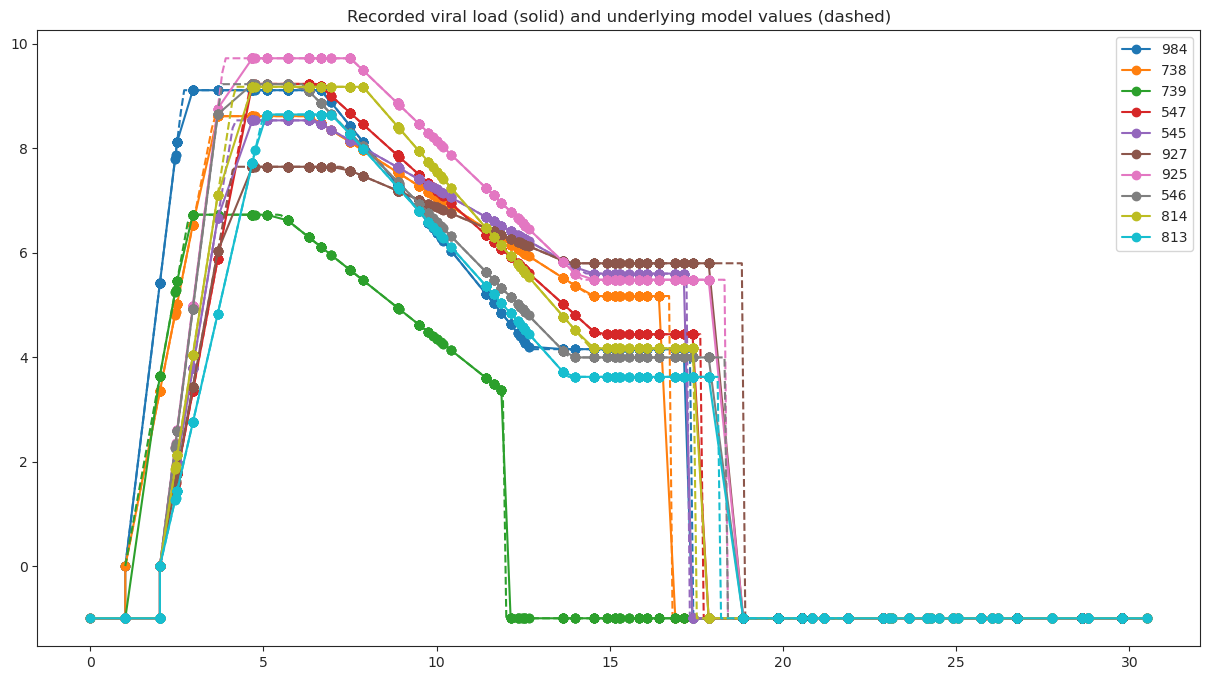

In [30]:
from seirsplus.calibration import _get_vl_with_plateau

plt.figure(figsize=(15,8))

for i in infected_nodes[:10]:
    # plot recorded infection curves (recording times = times at which a transition happened;
    # might be sparse if initial prevalence is low)
    plt.plot(
        sim_correlated_2.model.VL_over_time["time_points"],
        sim_correlated_2.model.VL_over_time["VL_time_series"][i],
        '-o',
        label=str(i), 
    )

    # plot underlying model values to make sure the recorded values match
    tmp = []
    time_range = np.linspace(
        sim_correlated_2.model.infection_start_times[i], 
        sim_correlated_2.model.infection_start_times[i] + 20, 
        201
    )
    for t in time_range:
        tmp.append(
            _get_vl_with_plateau(
                critical_time_points = sim_correlated_2.model.VL_params_by_node[i]["critical_time_points"],
                peak_plateau_height = sim_correlated_2.model.VL_params_by_node[i]["peak_plateau_height"],
                tail_height = sim_correlated_2.model.VL_params_by_node[i]["tail_height"],
                sample_time = t - sim_correlated_2.model.infection_start_times[i]
            )
        )
    plt.plot(time_range, tmp, '--', color=plt.gca().lines[-1].get_color())
plt.legend()

plt.title("Recorded viral load (solid) and underlying model values (dashed)")

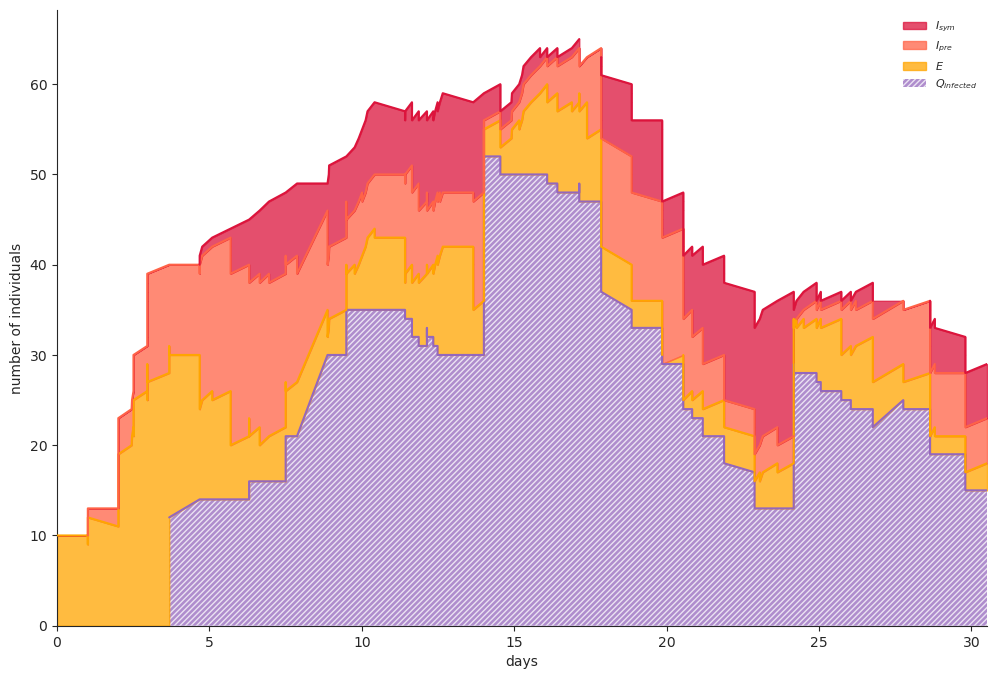

(<Figure size 1200x800 with 1 Axes>,
 <Axes: xlabel='days', ylabel='number of individuals'>)

In [31]:
sim_correlated_2.model.figure_infections(plot_percentages=False)

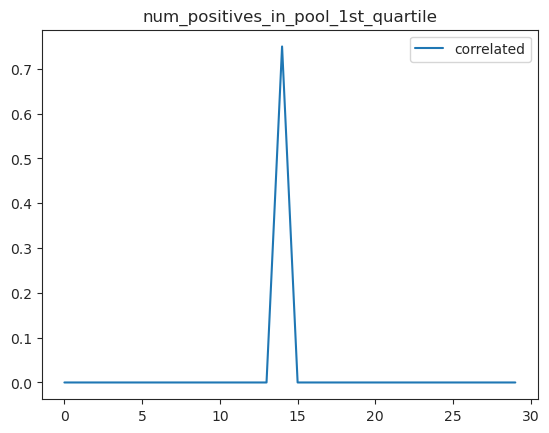

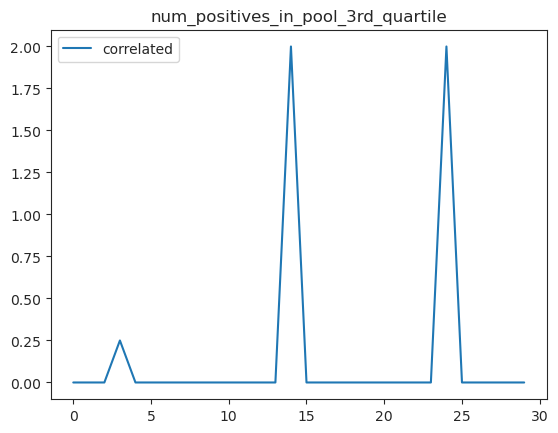

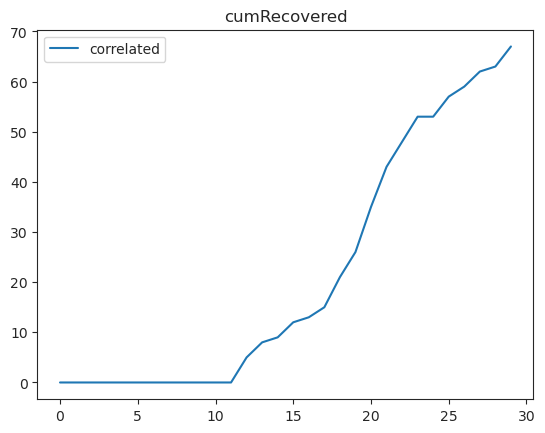

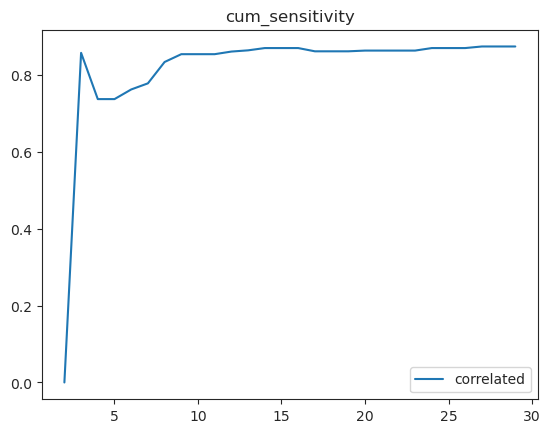

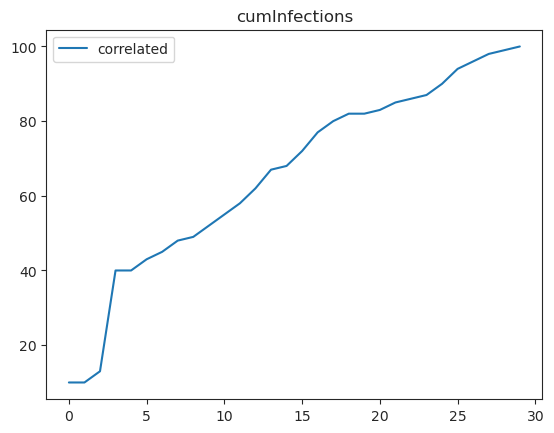

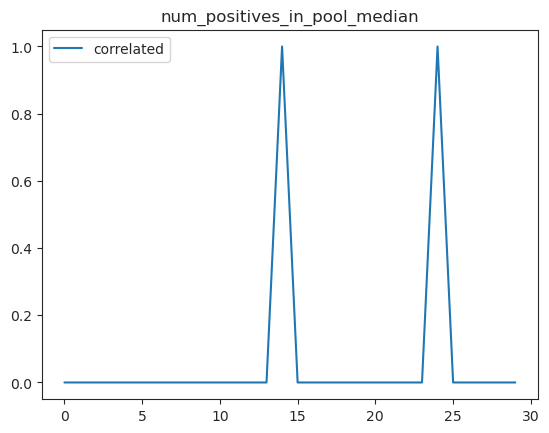

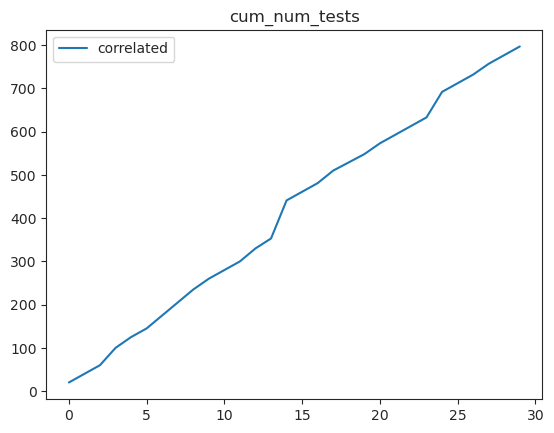

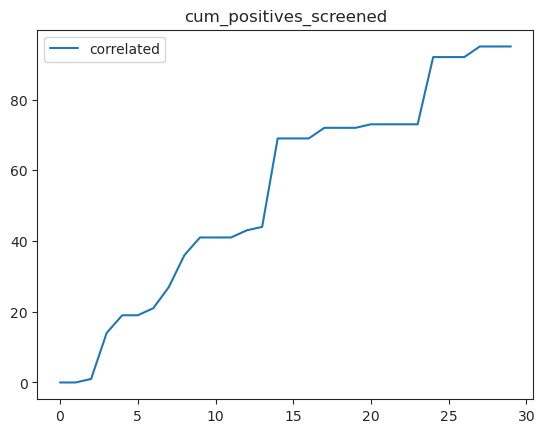

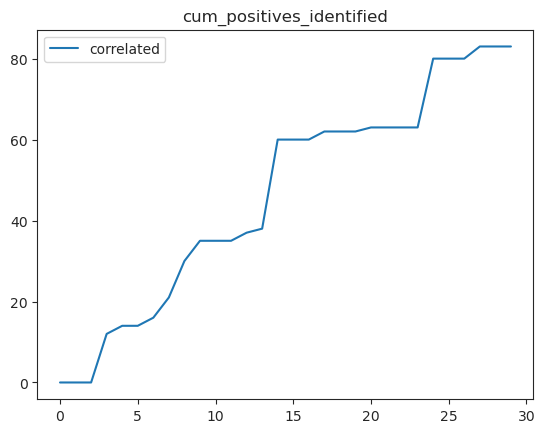

In [32]:
metrics = sim_correlated_2.overall_results[0].keys()
metrics = set(metrics) - {"day"}

for metric in metrics:
    plt.plot([result[metric] for result in sim_correlated_2.overall_results])
    plt.title(metric)
    plt.legend(['correlated', 'naive'])
    plt.show()

In [33]:
sim_correlated_2.model.VL_params_by_node[739]

{'critical_time_points': [1.8441633934601107, 4.478113793881777, 11.0, 11.0],
 'peak_plateau_height': 6.728393242306364,
 'tail_height': 3.294769554685667}

In [34]:
sim_correlated_2.model.symptomatic_by_node[739]

array([False])